In [1]:
#importar librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#Cargar datos
temperatura = pd.read_csv("temps.csv")
temperatura = pd.DataFrame(temperatura)
print(temperatura.shape)
print (temperatura.head(10))

(348, 12)
   year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1    Fri      45      45     45.6      45             43   
1  2016      1    2    Sat      44      45     45.7      44             41   
2  2016      1    3    Sun      45      44     45.8      41             43   
3  2016      1    4    Mon      44      41     45.9      40             44   
4  2016      1    5   Tues      41      40     46.0      44             46   
5  2016      1    6    Wed      40      44     46.1      51             43   
6  2016      1    7  Thurs      44      51     46.2      45             45   
7  2016      1    8    Fri      51      45     46.3      48             43   
8  2016      1    9    Sat      45      48     46.4      50             46   
9  2016      1   10    Sun      48      50     46.5      52             45   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2    

1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de otro modo, realice un análisis descriptivo de sus datos, comente.

In [3]:
temperatura.info() #Obtener información sobre las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
#Obtener descriptivos de los datos
descriptivos_numericos = temperatura.describe()
print(descriptivos_numericos)
print()
descriptivo_categoricos = temperatura.describe(include = "object")
print(descriptivo_categoricos)

         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179 

In [5]:
#Determinar si existen valores outliers en los datos

#Obtención de RIQ y límite superior (Q3 + 1.5RIQ)
X = temperatura.drop(["week", "year","month", "day"], axis = 1) #eliminar variables categóricas
P25 = X.quantile(0.25).to_frame() #obtener percentil 25
P75 = X.quantile(0.75).to_frame() #obtener percentil 75

RIQ = pd.merge(P25, P75, right_index=True, left_index=True) #generar un df con ambos valores
RIQ["RIQ"] = RIQ[0.75] - RIQ[0.25] #calcular RIQ
RIQ["Lim"] = RIQ[0.75] + RIQ["RIQ"]*1.5 #Obtener límite superior para detección de outliers

# Obtener los valores outliers

outliers = pd.DataFrame() #gen df empty
i = 0 #def interador

for i in range(8):
    riq = RIQ.iloc[i,3] #obtener el lim superior
    a = X[X.iloc[:, lambda df: [i]] > riq].dropna(how = "all") #filtrar df
    outliers = pd.concat([outliers,a]) #concatenar 
    
i = 0 + 1 #incrementar el iterador

outliers


,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
287,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN


2. Realice un análisis gráfico de las temperaturas máximas históricas, las temperaturas de los dos días anteriores y la estimación del amigo, con respecto a la fecha. Comente si hay anomalías.

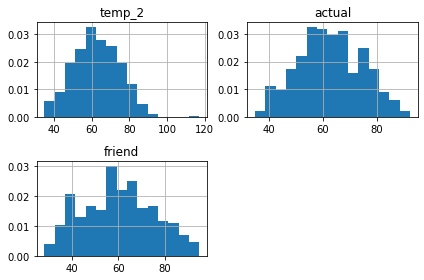

In [6]:
graph = temperatura[["temp_2", "actual", "friend"]]
graph.hist(bins = 15, density = True)
plt.tight_layout() #para que no se superpongan las gráficas
plt.show()

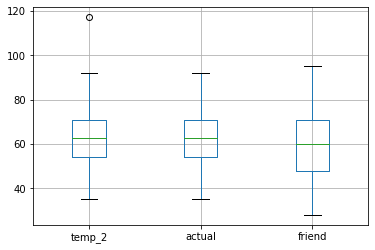

In [7]:
graph.boxplot()
plt.show()

3. Recodifique los días de la semana, creando siete variables 1-0 asociados a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas.

In [8]:
temperatura = pd.get_dummies(temperatura)
temperatura.head(10)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
5,2016,1,6,40,44,46.1,51,43,49,48,40,0,0,0,0,0,0,1
6,2016,1,7,44,51,46.2,45,45,49,46,38,0,0,0,0,1,0,0
7,2016,1,8,51,45,46.3,48,43,47,46,34,1,0,0,0,0,0,0
8,2016,1,9,45,48,46.4,50,46,50,45,47,0,0,1,0,0,0,0
9,2016,1,10,48,50,46.5,52,45,48,48,49,0,0,0,1,0,0,0


4. Ahora, separe los datos en predictores y variable respuesta. Su variable Y es la temperatura máxima real y los predictores son todas las columnas que usa el modelo para hacer una predicción. Asegúrese de transformar en una matriz Numpy porque esa es la forma en que funciona el algoritmo.

In [9]:
Y = temperatura["actual"].values.reshape(-1,1)
X = temperatura.drop("actual", axis = 1)

5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla (random_state = 42) para obtener los mismos valores.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=42
)

6. Cree una línea de base, es decir, el error que obtendremos si simplemente predijéramos la temperatura máxima promedio para todos los días.

In [11]:
#definición de datos y target
Y_1 = temperatura["average"].values.reshape(-1,1)
X_1 = temperatura.drop(["average","actual"], axis = 1)

#partición en train y test
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=42
)

# Create a Random Forest regressor
rf = RandomForestRegressor(
    n_estimators=1000,
    random_state=42
)

# Train the regressor
rf.fit(X1_train, y1_train)

#error
print(rf.score(X1_test, y1_test))

predicciones = rf.predict(X = X1_test)

#rmse
rmse = mean_squared_error(
        y_true  = y1_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")






C:\Users\Default.DESKTOP-GVJJTQ5\AppData\Local\Temp\ipykernel_640\1916390651.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X1_train, y1_train)


0.8128487257488989
El error (rmse) de test es: 5.101657512937373


7. Ajuste un modelo de regresión de bosque aleatorio con los datos de entrenamiento. Implemente 1000 árboles y use la misma semilla declarada en el punto 5.

In [12]:
# Create a Random Forest regressor
rf_1 = RandomForestRegressor(
    n_estimators=1000,
    random_state=42
)

# Train the regressor
rf_1.fit(X_train, y_train)

C:\Users\Default.DESKTOP-GVJJTQ5\AppData\Local\Temp\ipykernel_640\4012055744.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_1.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

8. Obtenga la predicción. Coméntalo.

In [13]:
# Make predictions on the test set
y_pred = rf_1.predict(X_test)
print(y_pred)


[69.857 61.319 51.891 61.321 66.463 70.162 78.848 75.786 62.121 74.078
 63.647 72.176 38.472 62.433 71.594 56.012 60.943 56.995 56.748 76.113
 63.758 54.401 66.493 62.468 58.786 53.032 66.769 46.448 62.122 80.176
 73.833 64.313 55.188 81.972 74.178 61.695 53.636 51.424 68.929 42.452
 70.385 57.373 76.172 42.396 61.098 74.08  52.745 81.369 53.325 42.487
 46.507 42.144 64.17  65.709 74.13  61.339 55.177 59.945 54.651 59.664
 65.491 50.052 60.849 70.188 60.062 59.236 71.743 69.796 76.83  41.32
 76.868 56.783 60.378 50.519 54.426 64.003 43.711 74.354 47.306 52.326
 53.526 68.21  73.607 72.658 63.243 57.175 46.04 ]


9. Obtenga las métricas de precisión.

In [14]:
#error
print(rf_1.score(X_test, y_test))

#rmse
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

0.8128487257488989
El error (rmse) de test es: 5.101657512937373
